<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="padding-top:25px;width: 180px"><img src="https://mci.edu/templates/mci/images/logo.svg" alt="Logo"></td>
        <td style="width: 100%">
            <div style="text-align:right; width: 100%; text-align:right"><font style="font-size:38px"><b>Visualisierung und Datenbanken</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>WS 2022</b></font></div>
        </td>
    </tr>
</table>

---

# 4 Randomness and Statistical Plots in Python


In this chapter, we will work with numpy to create synthetic data that follows a paramteric probability distribution. Random numbers are a useful tool in many algorithms and simulation. They also help us to understand how different plots and statistical tests work.


## Creating Random Numbers


Numpy allows You to create random number from different distributions. 

For instance, you can draw from countinous random distribution between $0$ and $1$ using the ```random``` function.

As You see, in the following, each call will generate a new random number:

In [2]:
import numpy as np

np.random.random()

0.02591497513312746

In [3]:
np.random.random()

0.7080466162697059

### Setting a Seed

Random numebrs generated by a computer are not really random. However, they behave as if they are.

In some cases, You want randomness, but also repoduce the results. For instance, when You want to change some problem in Your code and rerun the script.

Setting an RadomState with an abirary number let's the process on generating random numbers start from the same state, resulting in the same results anytime You run the code:

In [4]:
rng = np.random.RandomState(2021)

rng.random()

0.6059782788074047

In [5]:
rng = np.random.RandomState(2021)

rng.random()

0.6059782788074047

### Creating Multiple Random Numbers
 
As numpy is based on arrays, most random number generators let define You an array size to create multiple random numbers. Let's assume we draw a random sample from uniform data:

In [6]:
rng = np.random.RandomState(2021)
uniform_data = rng.random(size = 5)

✍️ **Task**

Write to functions, that calculate the 
- mean and the 
  $$\bar{x} = \frac{1}{n}\sum^n_{i=1}{x_i}$$
- Unbiased variance of the sample:    
  $$s^{2} = \frac{\displaystyle\sum_{i=1}^N (x_i-\bar x)^2}{n - 1}$$


Test if the numpy function ```mean()``` and ```var()``` return the same results.

In [7]:
def calc_mean(array):
  sum = 0
  for x in array:
    sum = sum + x
  return sum/len(array)

print(calc_mean(uniform_data))
print(uniform_data.mean())

0.5576422323848614
0.5576422323848614


In [8]:
def calc_var(array):
  sum = 0
  mean = calc_mean(array)
  for x in array:

    sum = sum + (x-mean)**2
  return sum/(len(array)-1)

print(calc_var(uniform_data))
print(uniform_data.var())

0.11544523238409939
0.09235618590727951


We see that the ```var()``` function does not calculate the unbiased variance of the sample, but results in a smaller number, most likely calculating the variance of the population:   

$$\sigma^{2} = \frac{\displaystyle\sum_{i=1}^N (x_i-\mu)^2}{N}$$

Is this a problem we have to care about in practice?

✍️**Task**

The true variance of a uniform distribution is 
$$V(X)={\frac {1}{12}}(b-a)^{2}$$

Create a DataFrame with three columns: `'Sample Size'`,`'Variance'`,`'Calculation Method'`

Draw samples with 1 up to 100 numbers and put the resulting variances in the DataFrame. 

For each sample size store: The true variance ($1/12$), the unbiased sample variance and the variance based on the formula for the whole population. 

Create a line plot so show, how the variance develops with sample size.

In [9]:
import pandas as pd

results_df = pd.DataFrame(columns=['Sample Size','Variance','Calculation Method'])
real_var = 1/12

for sample_size in range(1,100):
  sample = rng.random(size = sample_size)

  new_row = {'Sample Size': sample_size, 
             'Variance': real_var,
             'Calculation Method' : 'True Variance'
             } 

  results_df = results_df.append(new_row, ignore_index=True)

  new_row = {'Sample Size': sample_size, 
             'Variance': calc_var(sample),
             'Calculation Method' : 'Unbiased variance of the sample'
             } 

  results_df = results_df.append(new_row, ignore_index=True)

  new_row = {'Sample Size': sample_size, 
             'Variance': sample.var(),
             'Calculation Method' :'Variance of the population'
             } 

  results_df = results_df.append(new_row, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


In [10]:
results_df

,Sample Size,Variance,Calculation Method
0,1,0.083333,True Variance
1,1,NaN,Unbiased variance of the sample
2,1,0.000000,Variance of the population
3,2,0.083333,True Variance
4,2,0.164699,Unbiased variance of the sample
...,...,...,...
292,98,0.096848,Unbiased variance of the sample
293,98,0.095860,Variance of the population
294,99,0.083333,True Variance
295,99,0.071934,Unbiased variance of the sample


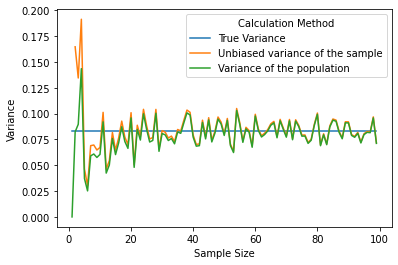

In [11]:
import seaborn as sns

sns.lineplot(data=results_df, x="Sample Size", y="Variance", hue="Calculation Method")




We observe, hat the $(n-1)$ does not make a big difference, once we reach 10 samples.
We see, that a sample size of 30 is large enough to provide reasonable estimates for the true variance.

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

## Plotting Random Numbers

### Histogram

To improve our understanding of the data, we can plot a histogram.

Seaborn, provides a ```histplot()``` that just works like any other plot. The crucial parameter of a histogram is the number of bins.

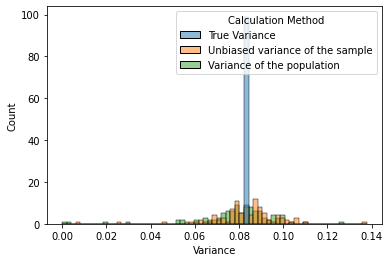

In [ ]:
sns.histplot(data=results_df, x="Variance", hue = "Calculation Method")

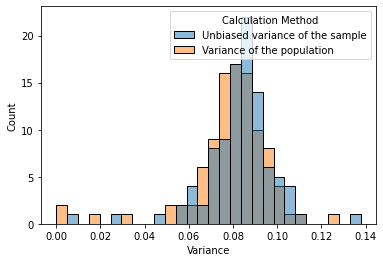

In [ ]:
results_df_plot = results_df[results_df["Calculation Method"]!="True Variance"]

sns.histplot(data=results_df_plot, x="Variance", hue = "Calculation Method")

Filtering out the true variance of ($1/12 = 0.8333$), we can that that variance formula for the population variance has the tenency to underestatimate the true variance.

✍️ **Task**

Play around with the parameters like bin size, You find in the [documentation](
https://seaborn.pydata.org/generated/seaborn.histplot.html)

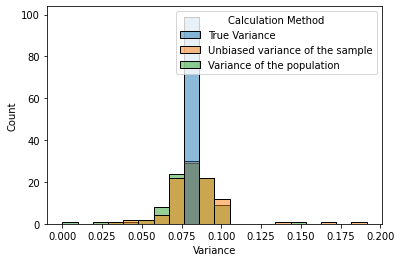

In [12]:
sns.histplot(data=results_df, x="Variance", hue = "Calculation Method",common_norm=True, bins =20)

### Box Plots

The box plots show some outliers and that the inter quartile range is pretty small. Even when there is no real differences between the boxes (both estimators are good), here the tendendy for unserestimation of the second formular is even more obvious.

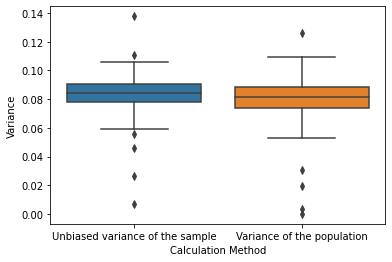

In [ ]:
sns.boxplot(data=results_df_plot, x="Calculation Method", y="Variance")

### 🤓 Empirical Cumulative Density Functions

Finally, the [Empirical Cumulative Density Functions](https://seaborn.pydata.org/generated/seaborn.ecdfplot.html) sorts the data in ascending order and puts the porportion on the y-axis. In this way You can directly read the quantile-values from the graph.

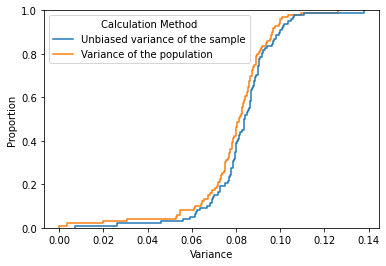

In [ ]:
sns.ecdfplot(data=results_df_plot, hue="Calculation Method", x="Variance")

If you want to get the Quantiles directly, you can use the pandas quantile function:

In [ ]:
results_df_plot["Variance"].quantile(q=0.5)

0.08283415768205502

In [ ]:
def q_25(x):
    return x.quantile(0.25)

def q_75(x):
    return x.quantile(0.75)

f = {'Variance': ['median', 'std', q_25, q_75]}
df1 = results_df.groupby('Calculation Method').agg(f)
df1

Variance                              
                                   median       std      q_25      q_75
Calculation Method                                                     
True Variance                    0.083333  0.000000  0.083333  0.083333
Unbiased variance of the sample  0.083986  0.016032  0.077681  0.090254
Variance of the population       0.081433  0.018254  0.073901  0.088644

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

## 🏆 Challenge: Penguins 2

- use the statistical plots to answer the following questions:
  - Are there any outliers in the observations of bill_length_mm	bill_depth_mm	flipper_length_mm	body_mass_g in each species? 
  - Do you find a difference in the species regarding bill_length_mm or bill_depth_mm?
  - 🤓 Remove all outlier from the data based on the individual species (drop observations with values outside $1.5 \cdot IQR$ from the median)

*Hint*: If You use a for loop remember to plot a new figure in each passing of the loop

In [13]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


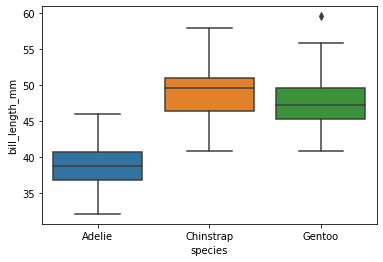

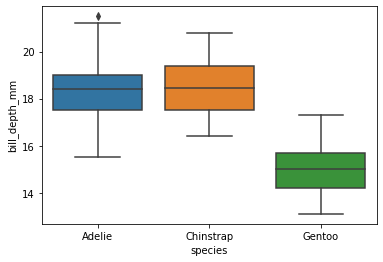

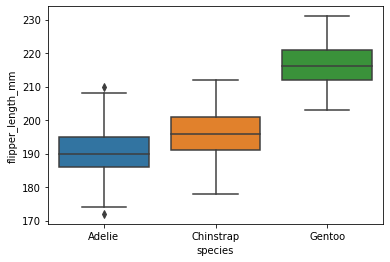

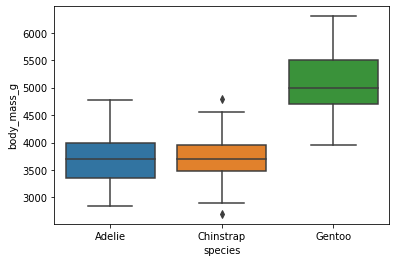

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib
import matplotlib.pyplot as plt

for variable in ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]:
  sns.boxplot(data=penguins, x="species", y=variable)
  plt.figure()

In [70]:
def q_25(x):
    return x.quantile(0.25)

def q_75(x):
    return x.quantile(0.75)

f = {'bill_length_mm': ['count','median', 'std', q_25, q_75]}
df1 = penguins.groupby('species').agg(f)
df1

bill_length_mm                                
                   count median       std   q_25    q_75
species                                                 
Adelie               151  38.80  2.663405  36.75  40.750
Chinstrap             68  49.55  3.339256  46.35  51.075
Gentoo               123  47.30  3.081857  45.30  49.550

In [76]:
cutoffs = {}

for species in penguins["species"].unique():
  print(species)

  penguin_species = penguins[penguins["species"]==species].copy()
  
  cutoffs[species] = {}

  for variable in ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]:
    print(variable)
    iqr = penguin_species[variable].quantile(0.75) - penguin_species[variable].quantile(0.25) 
    print(iqr)

    
    low = penguin_species[variable].quantile(0.50) - 1.5 * iqr
    high = penguin_species[variable].quantile(0.50) + 1.5 * iqr

    cutoffs[species][variable] = {"high" : high,
               "low" : low}


    #cutoffs[variable]= species_data

    #relevant_penguins = penguins[penguins["species"]==species][variable]
    #print(relevant_penguins>high)
    #print(relevant_penguins<low)
    #relevant_penguins

Adelie
bill_length_mm
4.0
bill_depth_mm
1.5
flipper_length_mm
9.0
body_mass_g
650.0
Chinstrap
bill_length_mm
4.725000000000001
bill_depth_mm
1.8999999999999986
flipper_length_mm
10.0
body_mass_g
462.5
Gentoo
bill_length_mm
4.25
bill_depth_mm
1.5
flipper_length_mm
9.0
body_mass_g
800.0


In [77]:
cutoffs

{'Adelie': {'bill_length_mm': {'high': 44.8, 'low': 32.8},
  'bill_depth_mm': {'high': 20.65, 'low': 16.15},
  'flipper_length_mm': {'high': 203.5, 'low': 176.5},
  'body_mass_g': {'high': 4675.0, 'low': 2725.0}},
 'Chinstrap': {'bill_length_mm': {'high': 56.6375, 'low': 42.46249999999999},
  'bill_depth_mm': {'high': 21.299999999999997, 'low': 15.600000000000001},
  'flipper_length_mm': {'high': 211.0, 'low': 181.0},
  'body_mass_g': {'high': 4393.75, 'low': 3006.25}},
 'Gentoo': {'bill_length_mm': {'high': 53.675, 'low': 40.925},
  'bill_depth_mm': {'high': 17.25, 'low': 12.75},
  'flipper_length_mm': {'high': 229.5, 'low': 202.5},
  'body_mass_g': {'high': 6200.0, 'low': 3800.0}}}

In [82]:
clean_data = penguins.copy()
clean_data["outlier"] = False
for species in penguins["species"].unique():

  df_in = clean_data[:]

  for variable in ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]:


    filter_is_species = df_in["species"]==species
    filter_to_high = df_in[variable] > cutoffs[species][variable]["high"]
    filter_to_low = df_in[variable] < cutoffs[species][variable]["low"]
    filter_common = ((filter_to_low | filter_to_high) & filter_is_species)
    clean_data["outlier"] = filter_common | clean_data["outlier"]

clean_data[clean_data["outlier"]==False]


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,outlier
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,False
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,False
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,False
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,False
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,False
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,False
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,False
